In [1]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt

In [2]:
class BlackScholes:
    def __init__(self,S,K,T,r,sigma,type):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.type = type

        

    def price_options(self):
        d1 = (np.log(self.S/self.K) + (self.r +  (0.5 * self.sigma ** 2))*self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - ( self.sigma * np.sqrt(self.T) )

        if self.type == 'c':
            price = self.S *  norm.cdf(d1) - (self.K * np.exp(-self.r * self.T) * norm.cdf(d2))

        elif self.type == 'p':
            price = (self.K * np.exp(-self.r * self.T) * norm.cdf(-d2)) - (self.S *  norm.cdf(-d1))

        return price
    
    def plot_stocks_vs_optionsprice(self):
        x = np.linspace(0.75*self.K,1.2*self.K,100)
        prices = np.zeros(100)
        payoff = np.zeros(100)
        for i in range(0,100):
            S = x[i]
            prices[i] = BlackScholes(S,self.K,self.T,self.r,self.sigma,self.type).price_options()

            if self.type == 'c':
                payoff[i] = np.maximum(x[i]-self.K,0)
            elif self.type == 'p':
                payoff[i] = np.maximum(self.K-x[i],0)
         
        plt.axvline(x=self.K, color='r', linestyle='--', label='Strike Price')
        plt.plot(x,payoff,label=f'{self.type} payoff')
        plt.plot(x,prices,label=f'{self.type} option Price')
        plt.legend()
        plt.show()

    def get_greeks(self,show = False):
        d1 = (np.log(self.S/self.K) + (self.r +  (0.5 * self.sigma ** 2))*self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - ( self.sigma * np.sqrt(self.T) )
        
        if self.type == 'c':
            delta = norm.cdf(d1)
            gamma = norm.pdf(d1) / (self.S * self.sigma * np.sqrt(self.T))
            theta = - (self.S * norm.pdf(d1) * self.sigma) / (2 * np.sqrt(self.T)) - self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
            vega = self.S * np.sqrt(self.T) * norm.pdf(d1)
            rho = self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(d2)
        elif self.type == 'p':
            delta = norm.cdf(d1) - 1
            gamma = norm.pdf(d1) / (self.S * self.sigma * np.sqrt(self.T))
            theta = - (self.S * norm.pdf(d1) * self.sigma) / (2 * np.sqrt(self.T)) + self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-d2)
            vega = self.S * np.sqrt(self.T) * norm.pdf(d1)
            rho = -self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(-d2)
        
        if show:
            print(f'delta: {delta}')
            print(f'gamma: {gamma}')
            print(f'theta: {theta}')
            print(f'vega: {vega}')
            print(f'rho: {rho}')

        return delta,gamma,theta,vega,rho

    def plot_greeks(self):
        x = np.linspace(0.75*self.K,1.2*self.K,100)
        delta = np.zeros(100)
        gamma = np.zeros(100)
        theta = np.zeros(100)
        vega = np.zeros(100)
        rho = np.zeros(100)
        for i in range(0,100):
            S = x[i]
            delta[i],gamma[i],theta[i],vega[i],rho[i] = BlackScholes(S,self.K,self.T,self.r,self.sigma,self.type).get_greeks()
        
        # plotting on 4 different subplots
        plt.figure(figsize=(10, 6))
        plt.subplot(3,2,1)
        plt.plot(x,delta)
        plt.title('Delta')
        plt.subplot(3,2,2)
        plt.plot(x,gamma)
        plt.title('Gamma')
        plt.subplot(3,2,3)
        plt.plot(x,theta)
        plt.title('Theta')
        plt.subplot(3,2,4)
        plt.plot(x,vega)
        plt.title('Vega')
        plt.xlabel('Stock Price')
        plt.ylabel('Greeks')
        plt.tight_layout()
        plt.show()

    def implied_volatility(self, market_price, show = False):
        
        vol = 0.5
        tol = 0.0001
        max_iter = 1000
        
        x = []
        y = []


        for i in range(max_iter):
            
            theoretical_price = BlackScholes(self.S,self.K,self.T,self.r,vol,self.type).price_options()
            vega = BlackScholes(self.S,self.K,self.T,self.r,vol,self.type).get_greeks()[3] # vega = dC/dsigma
            
            if abs(theoretical_price - market_price) < tol:
                break
            
            x.append(vol)
            y.append(abs(theoretical_price - market_price))
            
            vol = vol - (theoretical_price - market_price)/vega

        if show:
            plt.plot(x,y)
            plt.xlabel('Volatility')
            plt.ylabel('Theoretical Price - Market Price')
            plt.axvline(x=vol, color='r', linestyle='-', label='Implied Volatility')
            plt.title('Implied Volatility')
            plt.show()
            
        return vol


In [3]:
S = 100
K = 120
sigma = 0.29
T = 30/365 # time until expiration in years
r = 0.01


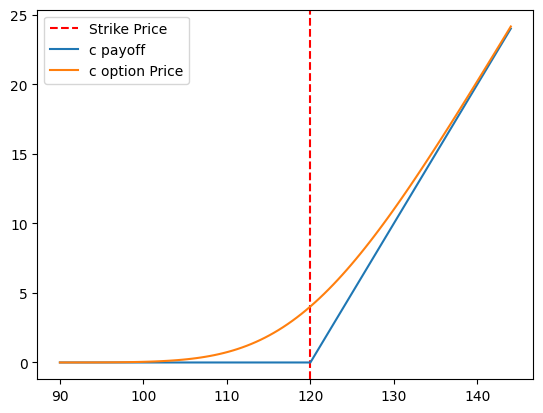

In [4]:
option_1 = BlackScholes(S,K,T,r,sigma,'c')
option_1.price_options()
option_1.plot_stocks_vs_optionsprice()

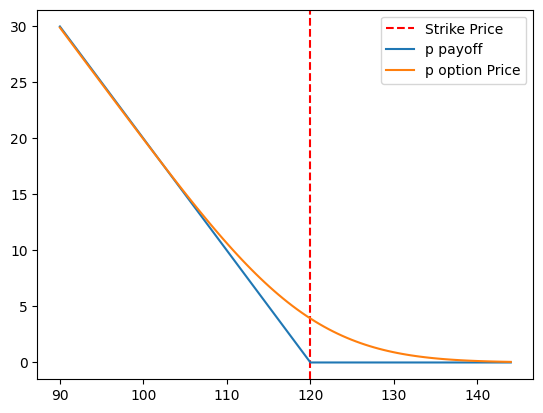

In [5]:
option_2 = BlackScholes(S,K,T,r,sigma,'p')
option_2.price_options()
option_2.plot_stocks_vs_optionsprice()

delta: 0.016117705525926562
gamma: 0.004844791639298077
theta: -2.05288608431299
vega: 1.1547859523806374
rho: 0.1286399999025975


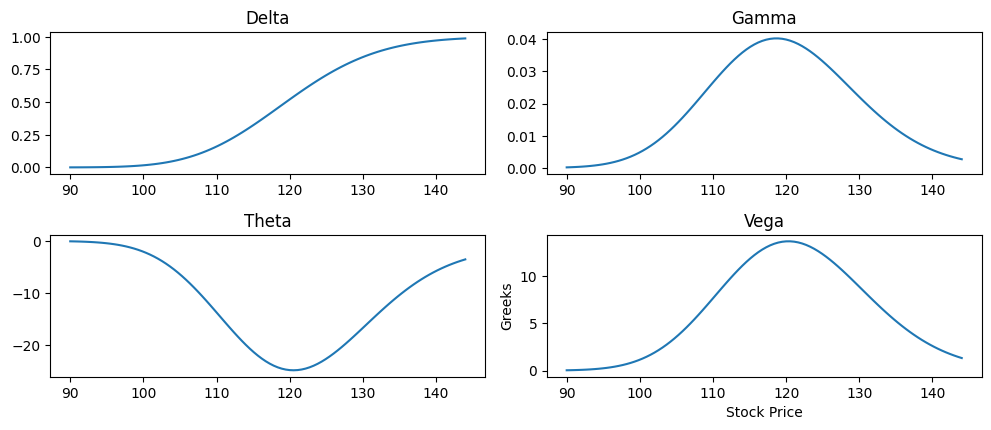

In [6]:
option_1.get_greeks(show=True)
option_1.plot_greeks()

Calculate Implied Volatility

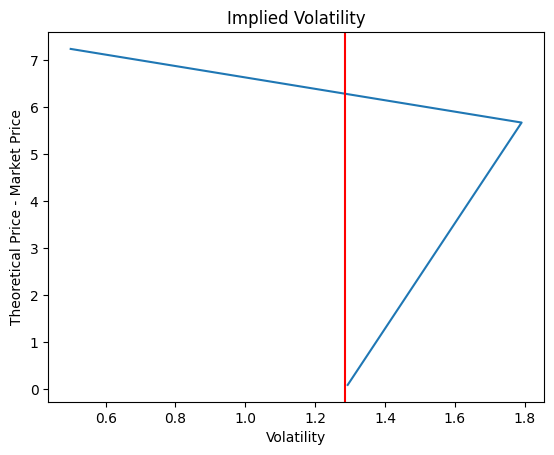

Implied Volatility for call option: 1.2848742336979861


In [7]:
# sigma such that the theoretical price of the option = market price of the option
iv1 = option_1.implied_volatility(8,show = True)
print(f'Implied Volatility for call option: {iv1}')


Text(0.5, 1.0, 'Implied Volatility vs Market Price')

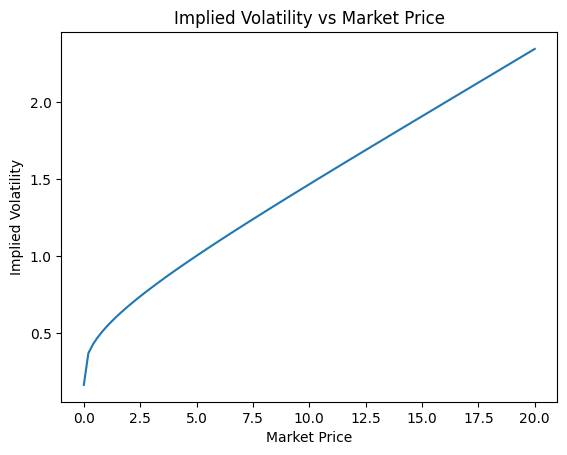

In [8]:
# How iv changes with different market prices
x = np.linspace(0,20,100)
iv = np.zeros(100)
for i in range(0,100):
    iv[i] = BlackScholes(S,K,T,r,sigma,'c').implied_volatility(x[i])
    
plt.plot(x,iv)
plt.xlabel('Market Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs Market Price')

# Trading Stratergies

1. Covered Call

delta: 0.372482797961973
gamma: 0.04204275575378518
theta: -8.428174386737375
vega: 11.351544053522
rho: 5.053899858200545
2.1333684449162007 is the premium received for selling the call option


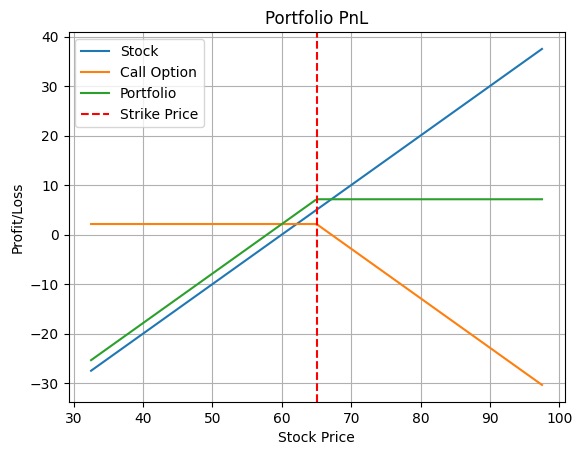

In [36]:
S = 60
K = 65
sigma = 0.3 # implied volatility
T = 0.25 # time until expiration in years
r = 0.08

# buy a stock + sell a call
purchase_price = 60
call_sold = BlackScholes(S,K,T,r,sigma,'c')
premium = call_sold.price_options()

print(f"{premium} is the premium received for selling the call option")

stock_prices = np.linspace(0.5*K,1.5*K,200)
PnL_stock = stock_prices - purchase_price
PnL_call = np.where(stock_prices < K, premium, premium + K - stock_prices)
PnL_portfolio = PnL_stock + PnL_call

plt.plot(stock_prices,PnL_stock,label='Stock')
plt.plot(stock_prices,PnL_call,label='Call Option')
plt.plot(stock_prices,PnL_portfolio,label='Portfolio')
plt.axvline(x=K, color='r', linestyle='--', label='Strike Price')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit/Loss')
plt.title('Portfolio PnL')
plt.grid(True)
plt.show()

2. Protected Put

5.846282209855289 is the premium paid for buying the put option


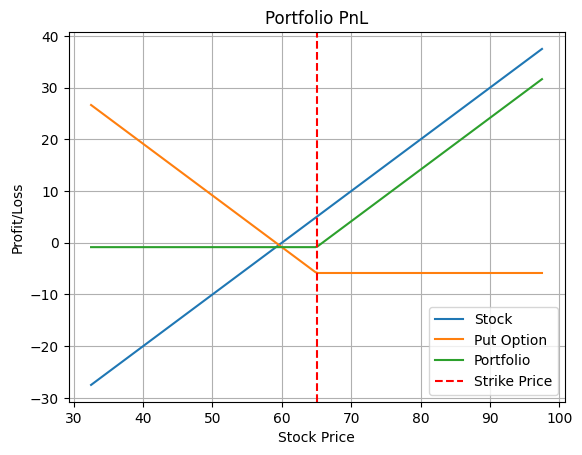

In [35]:
S = 60
K = 65
sigma = 0.3 # implied volatility
T = 0.25 # time until expiration in years
r = 0.08

# buy a stock + buy a put
purchase_price = 60
put_bought = BlackScholes(S,K,T,r,sigma,'p')
premium = put_bought.price_options()

print(f"{premium} is the premium paid for buying the put option")

stock_prices = np.linspace(0.5*K,1.5*K,200)
PnL_stock = stock_prices - purchase_price
PnL_put = np.where(stock_prices < K, K - premium - stock_prices, -premium)
PnL_portfolio = PnL_stock + PnL_put

plt.plot(stock_prices,PnL_stock,label='Stock')
plt.plot(stock_prices,PnL_put,label='Put Option')
plt.plot(stock_prices,PnL_portfolio,label='Portfolio')
plt.axvline(x=K, color='r', linestyle='--', label='Strike Price')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit/Loss')
plt.title('Portfolio PnL')
plt.grid(True)
plt.show()